In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab=r'$10^2L^{0.5}C_L^{\varpi\varpi}$')
    #errorbar(mb.bc-5,(Okk-Mkk),yerr=Vkk,fmt='o')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-Mkk)*1e6,yerr=mb.bc**0.5*Vkk*1e6,fmt='o')
    #errorbar(mb.bc+5,mb.bc**0.5*Mkk*1e6,yerr=mb.bc**0.5*Vkk*1e6,fmt='o')
    #plot(aobj.l,aobj.ckk,color='k',ls='--')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e6,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [9]:
dirs = local.data_directory()
#aobj = local.init_analysis_params(qid='comb_d',wind='com15',ivar='noivar')
#aobj = local.init_analysis_params(qid='comb_n',wind='com15',ivar='noivar')
#aobj = local.init_analysis_params(qid='comb_dn',wind='com16',ivar='noivar')
#aobj = local.init_analysis_params(qid='comb_dn',wind='com16',ivar='v3',ptsr='pt',ascale=3.)
#aobj = local.init_analysis_params(qid='boss_s16d',fltr='cinv')
#aobj = local.init_analysis_params(qid='boss_s15n',fltr='cinv')
aobj = local.init_analysis_params(qid='boss_alldn',fltr='cinv')
#aobj = local.init_analysis_params(qid='boss_s16d',fltr='cinv')
#aobj = local.init_analysis_params(qid='boss_s15n',ivar='noivar')
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,rlmax=2500,qlist=['TT'])

chi: 9.9 , chi (sim mean): -0.0 , chi (sim std): 6.1 , PTE: 0.12 
chi^2: 15.4 , chi^2 (sim): 11.1 , PTE: 0.17 
chi: 9.9 , chi (sim mean): -0.0 , chi (sim std): 6.1 , PTE: 0.12 
chi^2: 17.1 , chi^2 (sim): 11.1 , PTE: 0.09 


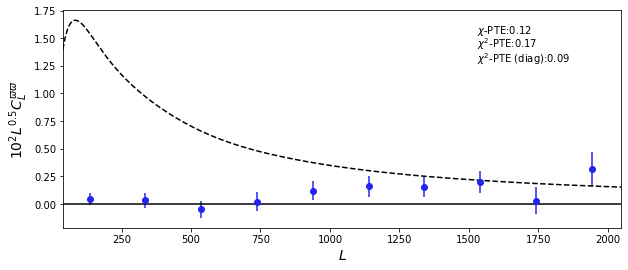

In [10]:
plot_spec(qobj,bnum=10,lmin=40)

chi: 12.0 , chi (sim mean): 0.0 , chi (sim std): 5.9 , PTE: 0.02 
chi^2: 14.4 , chi^2 (sim): 11.1 , PTE: 0.25 
chi: 12.0 , chi (sim mean): 0.0 , chi (sim std): 5.9 , PTE: 0.02 
chi^2: 20.4 , chi^2 (sim): 11.1 , PTE: 0.04 


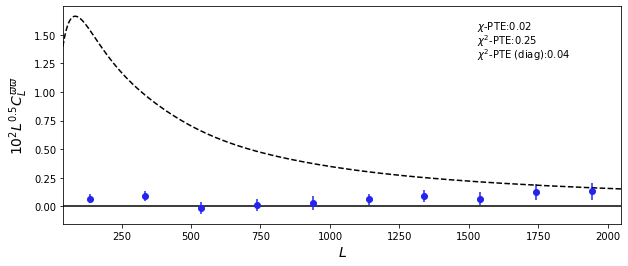

In [5]:
qobj1 = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=1000,rlmax=3000,qlist=['TT'])
plot_spec(qobj1,bnum=10,lmin=40)

In [6]:
aobj0 = local.init_analysis_params(qid='boss_s15n',fltr='cinv')
qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=500,qlist=['TT'])

chi: 12.1 , chi (sim mean): 0.0 , chi (sim std): 6.0 , PTE: 0.02 
chi^2: 18.4 , chi^2 (sim): 11.1 , PTE: 0.06 
chi: 12.1 , chi (sim mean): 0.0 , chi (sim std): 6.0 , PTE: 0.02 
chi^2: 26.2 , chi^2 (sim): 11.1 , PTE: 0.00 


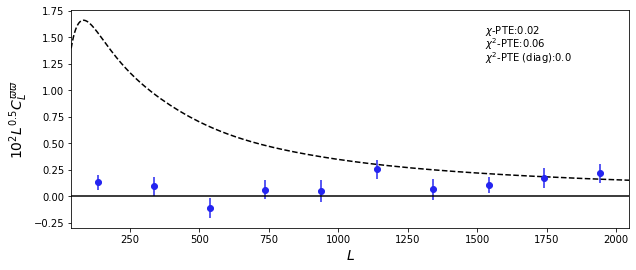

In [7]:
plot_spec(qobj0,bnum=10,lmin=40)

chi: 6.2 , chi (sim mean): -0.0 , chi (sim std): 5.7 , PTE: 0.30 
chi^2: 7.8 , chi^2 (sim): 11.2 , PTE: 0.64 
chi: 6.2 , chi (sim mean): -0.0 , chi (sim std): 5.7 , PTE: 0.30 
chi^2: 8.2 , chi^2 (sim): 11.2 , PTE: 0.61 


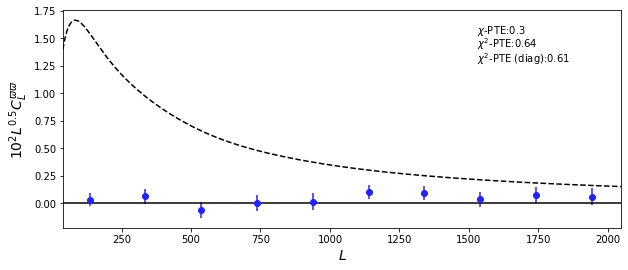

In [8]:
#aobj0 = local.init_analysis_params(qid='boss_alldn',fltr='none',wind='base',ivar='noivar')
aobj0 = local.init_analysis_params(qid='boss_alldn',fltr='none',wind='base',ivar='noivar')
qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=500,qlist=['TT'])
plot_spec(qobj0,bnum=10,lmin=40)